# Interpolación de Polinomal de Newton
La interpolación polinomal responde a estimar a la función  como un polinómio de grado  de la forma $f(x)=a_0+a_1x+a_2x^2+\cdots+a_nx^n$.
En el caso de la interpoación con polinómios de Newton se obtiene de la forma de representar el valor de una función en diferencias finitas. Por ejemplo, en el caso de la interpolación lineal $f_1(x)$ la interpolación esuna recta de la forma
$f_1(x)=f(x_0)+\frac{f(x_1)+f(x_0)}{x_1-x_0}(x_1-x_0)$,
de donde la pendiente es el término de la diferencia finita. Para el caso de la interpolación cuadrática $f_2(x)=b_0+b_1(x-x_0)+b_2(x-x_0)(x-x_1)$, los coeficientes de en términos de las defierencias finitas son:
$b_1=\frac{f(x_1)-f(x_0)}{x_1-x_0}$
$b_2=\frac{\frac{f(x_2)-f(x_1)}{x_2-x_1}-\frac{f(x_1)-f(x_0)}{x_1-x_0}}{x_2-x_0}$

donde la primera diferencia finita $f[x_i,x_j]=\frac{f(x_i)-f(x_j)}{x_i-x_j}$, la segunda diferencia finida $f[x_i,x_j,x_k]=\frac{f[x_i,x_j]-f[x_j,x_k]}{x_i-x_k}$

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/a8c0fd11b6d6174806bebf4f9b6c56bb694064b7/Clases/Imagenes/Interpol-Newton.png?raw=true" width="500">
</center>

## Ejemplo: Estimar el valor de  usando la interpolación de Newton
Recordando los términos de los coeficientes del polinómio de Newton hasta el grado 3:
Aproximamos el valor de $ln(2)$ usando iterpolación de Newton a partir de conocer los valores de $ln(1)$ y $ln(6)$.

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/9578301cea301df4db0e9d6e8a5d2ff3f73ded45/Clases/Imagenes/ln.png?raw=true" width="400">
</center>

In [6]:
import numpy as np

def newton_interpolation(x, y, x_approx):
    n = len(x)
    div_diff = np.zeros((n, n))
    div_diff[:, 0] = y

    for j in range(1, n):
        for i in range(j, n):
            div_diff[i, j] = (div_diff[i, j-1] - div_diff[i-1, j-1]) / (x[i] - x[i-j])

    coeff = div_diff[n-1, :]

    P = coeff[n-1]
    for k in range(n-2, -1, -1):
        P = P * (x_approx - x[k]) + coeff[k]

    return P

# Valores conocidos
x = [1, 6]
y = np.log(x)

# Evaluar el polinomio en x = 2
x_approx = 2
P = newton_interpolation(x, y, x_approx)

print(f'La aproximación de ln(2) usando interpolación de Newton es: {P:.15f}')

La aproximación de ln(2) usando interpolación de Newton es: 2.150111363073666


Ahora usando los puntos $x=4$ y $x=6$ 

In [7]:
import numpy as np

def newton_interpolation(x, y, x_target):
    n = len(x)
    divided_diff_table = np.zeros((n, n))
    divided_diff_table[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            divided_diff_table[i, j] = (divided_diff_table[i + 1, j - 1] - divided_diff_table[i, j - 1]) / (x[i + j] - x[i])

    coefficients = divided_diff_table[0, :]

    approx_ln2 = coefficients[0]
    product_term = 1

    for i in range(1, n):
        product_term *= (x_target - x[i - 1])
        approx_ln2 += coefficients[i] * product_term

    return approx_ln2

# Definir los puntos conocidos
x = [1, 4, 6]
y = np.log(x)

# Aproximar ln(2) usando el polinomio de interpolación de Newton
x_target = 2
approx_ln2 = newton_interpolation(x, y, x_target)

# Mostrar el resultado
print(f'Aproximación de ln(2) usando interpolación de Newton: {approx_ln2:.15f}')

Aproximación de ln(2) usando interpolación de Newton: 0.565844346900983


# Interpolación con Polinomios de Lagrange
Los polinómios de interpolación de Lagrande son una reformulación de los polinómios de Newton donde $f(x)=\sum_{i=0}^{n}L_i(x)f(x_i)$ donde los coeficientes de Lagrande son de la forma $L_i(x)=\prod_{j=0,j \neq i}^{n}\frac{x-x_j}{x_i-x_j}$

In [8]:
import numpy as np

def lagrange_interpolation(x, y, x_est):
    n = len(x)
    ln2_est = 0

    for i in range(n):
        L_i = 1
        for j in range(n):
            if j != i:
                L_i *= (x_est - x[j]) / (x[i] - x[j])
        ln2_est += y[i] * L_i

    return ln2_est

# Definir los puntos de datos (x, y)
x = [1, 4, 6]
y = np.log(x)

# Punto en el que se desea estimar ln(2)
x_est = 2

# Calcular el polinomio de Lagrange
ln2_est = lagrange_interpolation(x, y, x_est)

# Mostrar el resultado
print(f'El valor estimado de ln(2) usando interpolación de Lagrange es: {ln2_est:.10f}')
print(f'El valor verdadero de ln(2) es: {np.log(2):.10f}')
print(f'El error relativo es: {abs((ln2_est - np.log(2)) / np.log(2)) * 100:.10f}%')

El valor estimado de ln(2) usando interpolación de Lagrange es: 0.5658443469
El valor verdadero de ln(2) es: 0.6931471806
El error relativo es: 18.3659166811%


Las interpolaciones con los dos métodos anteriores se pueden usar tanto con datos igualmente espaciados como con espaciado no homogéneo.

# Interpolación mediante trazadores (Splines)
Cuando se tienen $n+1$ puntos es posible ajustar un polinómio de grado . Sin embargo, cuando la función no es un polinómio, es posible ajustar la función $f(x)$ por medio de tomar subconjuntos de $m$ datos y sobre ellos interpolar un polinómio de grado $m-1$. A estos polinómios se le conocen como trazadores o splines.

<center>
    <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/9578301cea301df4db0e9d6e8a5d2ff3f73ded45/Clases/Imagenes/spline.png?raw=true" width="500">
</center>

Por ejemplo, en las figuras se quiere interpolar la función escalón con polinómios de grado cada vez mas grande en el caso de las figuras a - c. Sin embargo, en la figura d se usa un polinómio de primer grado, lo que genera una mejor aproximación. Es decir, los trazadores se usan para aproximar mejor la función por sección, reproduciendo mejor el comportamiento cuando existen cambios abruptos de la función.

## Spline lineal
Si se tienen $n$ datos con $n-1$ intervalos, cada intervalo responde a un spline $s_i(x)$ que conecta a dons puntos de la forma $s_i(x)=a_i+b_i(x-x_i)$, donde $a_i=f_i$ y $b_i=\frac{f_{i+1}-f_i}{x_{i+1}-x_i}$. Donde cada función debe estar en el itervalo cerrado, es decir:



### Ejemplo
La interpolación por splines lineal de los datos:

   Punto    x  f_x_Exacto  f_x_Interpolado           Ecuacion_Segmento
0      1  3.0         2.5              2.5                Dato inicial
1      2  4.5         1.0              1.0  f(x) = 2.50 + -1.00(x-3.0)
2      3  7.0         2.5              2.5   f(x) = 1.00 + 0.60(x-4.5)
3      4  9.0         0.5              0.5  f(x) = 2.50 + -1.00(x-7.0)


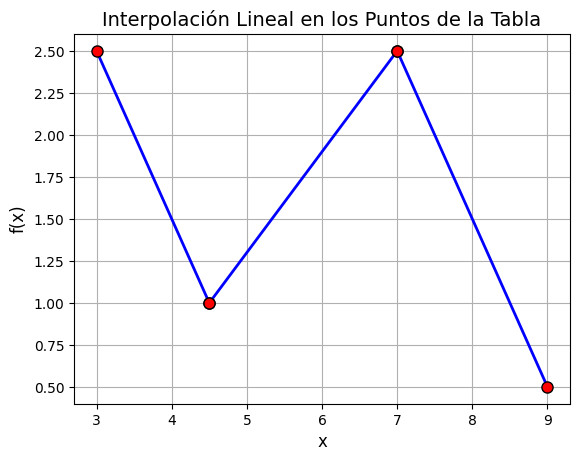

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos de entrada
x = np.array([3.0, 4.5, 7.0, 9.0])
f = np.array([2.5, 1.0, 2.5, 0.5])

# Ordenar los datos
sortIdx = np.argsort(x)
x = x[sortIdx]
f = f[sortIdx]

# Calcular pendientes
n = len(x) - 1
b = np.zeros(n)
for i in range(n):
    b[i] = (f[i + 1] - f[i]) / (x[i + 1] - x[i])

# Crear tabla de resultados
results = pd.DataFrame({
    'Punto': np.arange(1, len(x) + 1),
    'x': x,
    'f_x_Exacto': f,
    'f_x_Interpolado': f  # Los puntos originales coinciden
})

# Añadir ecuaciones de interpolación
segmentos = ['Dato inicial']
for i in range(n):
    segmentos.append(f'f(x) = {f[i]:.2f} + {b[i]:.2f}(x-{x[i]:.1f})')

results['Ecuacion_Segmento'] = segmentos

# Mostrar tabla completa
print(results)

# 4. Gráfica
plt.figure()
plt.gcf().set_facecolor('w')

# Dibujar los segmentos de recta
for i in range(n):
    plt.plot([x[i], x[i + 1]], [f[i], f[i + 1]], 'b-o',
             linewidth=2, markersize=8,
             markerfacecolor='r', markeredgecolor='k')

plt.grid(True)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Interpolación Lineal en los Puntos de la Tabla', fontsize=14)
plt.show()

## Spline cuadratico
En una inerpolación de splines lineales, no es posible obtener la derivadas $m-esimas$ sobre cada uno de los puntos interpolados. Para obtener poder asegurar estas derivadas es necesario que el polinómio sea de grado al menos $m+1$. 
En el caso de los splines cuadraticos se interpola una función de la forma $f(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2$. Si son  puntos entonces hay $n-1$ intervalos donde determinar la interpolación y por lo tanto habra contantes $a's$, $b's$ y $c's$.

Para poder obtener los coeficientes de cada una de estas funciones se deben cumplir las siguientes condiciones debido a que la interpolación se realiza sobre cada dos datos:
Los valores de la función de polinomios adyacentes deben ser iguales en los nodos interiores.  $f(x_i)=a_i+b_i(x_i-x_i)+c_i(x_i-x_i)^2$ esto implica que $f(x_i)=a_i$. Ya no es necesario determinar los coeficientes $a_i$ tan solo hay que determinar $c_i$ y $b_i$, por lo que haora solo habra que determinar $2(n-1)$ constantes.
La primera y la última función deben pasar a través de los puntos extremos.
Las primeras derivadas en los nodos interiores deben ser iguales.
Suponga que en el primer punto la segunda derivada es cero.

### Del Ejemplo
Tenemos cuatro puntos por lo que el númerto de intervalos es $n=3$. De la condición 1. y 2. y la 4.

de donde podemos calcular 5 constantes $b_1$, $b_2$, $b_3$, $c_2$ y $c_3$. De la condicion 3.


Ecuaciones de los splines cuadráticos:
Segmento 1 (3.0 ≤ x ≤ 4.5): f(x) = -0.6667x² + 4.0000x + -3.5000
Segmento 2 (4.5 ≤ x ≤ 7.0): f(x) = 1.0400x² + -11.3600x + 31.0600
Segmento 3 (7.0 ≤ x ≤ 9.0): f(x) = -2.1000x² + 32.6000x + -122.8000


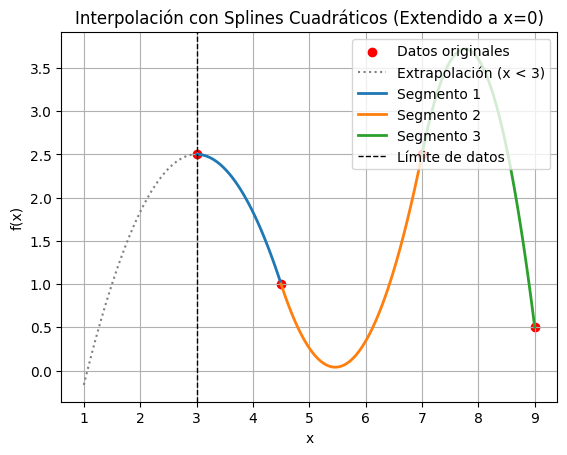

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
x = np.array([3.0, 4.5, 7.0, 9.0])
y = np.array([2.5, 1.0, 2.5, 0.5])
n = len(x) - 1  # Número de intervalos

# 1. Construcción del sistema de ecuaciones
A = np.zeros((3 * n, 3 * n))
b = np.zeros(3 * n)

# Condición 1: Los splines pasan por los puntos (2n ecuaciones)
for i in range(n):
    # Punto izquierdo
    A[2 * i, 3 * i:3 * i + 3] = [x[i] ** 2, x[i], 1]
    b[2 * i] = y[i]
    
    # Punto derecho
    A[2 * i + 1, 3 * i:3 * i + 3] = [x[i + 1] ** 2, x[i + 1], 1]
    b[2 * i + 1] = y[i + 1]

# Condición 2: Continuidad de la primera derivada en nodos internos
for i in range(n - 1):
    row = 2 * n + i
    A[row, 3 * i:3 * i + 3] = [2 * x[i + 1], 1, 0]
    A[row, 3 * (i + 1):3 * (i + 1) + 3] = [-2 * x[i + 1], -1, 0]

# Condición 3: Derivada cero en el primer punto (spline natural)
A[-1, :3] = [2 * x[0], 1, 0]

# 2. Resolver el sistema para los coeficientes
coeff = np.linalg.solve(A, b)

# 3. Organizar coeficientes en matriz [a, b, c] para cada spline
splines = coeff.reshape((n, 3))

# 4. Configuración de la gráfica
plt.figure()
plt.grid(True)
plt.title('Interpolación con Splines Cuadráticos (Extendido a x=0)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x, y, color='red', label='Datos originales')

# 5. Graficar cada spline cuadrático con extensión a cero
x_min = 1  # Extendemos desde x = 0
x_max = max(x)

# Primer segmento extendido (desde x=0 hasta x=3)
x_segment_ext = np.linspace(x_min, x[0], 100)
y_segment_ext = splines[0, 0] * x_segment_ext ** 2 + splines[0, 1] * x_segment_ext + splines[0, 2]
plt.plot(x_segment_ext, y_segment_ext, ':', linewidth=1.5, color='gray', label='Extrapolación (x < 3)')

# Segmentos originales
for i in range(n):
    x_segment = np.linspace(x[i], x[i + 1], 100)
    y_segment = splines[i, 0] * x_segment ** 2 + splines[i, 1] * x_segment + splines[i, 2]
    plt.plot(x_segment, y_segment, linewidth=2, label=f'Segmento {i + 1}')

# Línea vertical en x=3 para marcar el inicio de los datos
plt.axvline(x=3, color='k', linestyle='--', linewidth=1, label='Límite de datos')

plt.legend(loc='upper right')

# 6. Mostrar ecuaciones
print('\nEcuaciones de los splines cuadráticos:')
for i in range(n):
    print(f'Segmento {i + 1} ({x[i]:.1f} ≤ x ≤ {x[i + 1]:.1f}): f(x) = {splines[i, 0]:.4f}x² + {splines[i, 1]:.4f}x + {splines[i, 2]:.4f}')

plt.show()

## Spline cúbicos
Para el caso de esta interpolación se usa una función de la forma $f(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3$

Las suposiciones que se utilizan para obtener los coeficientes siguen reglas similares. Hay que observar que la condición 4. fue impuesta de tal forma que facilitara los cálculos. Esta suposición se hace de la misma manera para los splines cúbicos de tal forma que despues del desarrollo de cada una de las condiciones (pp.403 Chapra en español) se obtiene una matriz de la forma:

<center>
    <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/9578301cea301df4db0e9d6e8a5d2ff3f73ded45/Clases/Imagenes/matriz_cubico_natural.png?raw=true" width="500">
</center>

donde $f[x_{i+1},x_i]$ es la forma conocida de diferencias finitas. Al utilizar esta condición se le conoce como spline cpubico natural.